In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns 

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

## Context
### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Content
#### Attributes

#### People

ID: Customer's unique identifier<br>
Year_Birth: Customer's birth year <br>
Education: Customer's education level<br>
Marital_Status: Customer's marital status<br>
Income: Customer's yearly household income<br>
Kidhome: Number of children in customer's household<br>
Teenhome: Number of teenagers in customer's household<br>
Dt_Customer: Date of customer's enrollment with the company<br>
Recency: Number of days since customer's last purchase<br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br>

#### Products

<br>MntWines: Amount spent on wine in last 2 years
<br>MntFruits: Amount spent on fruits in last 2 years
<br>MntMeatProducts: Amount spent on meat in last 2 years
<br>MntFishProducts: Amount spent on fish in last 2 years
<br>MntSweetProducts: Amount spent on sweets in last 2 years
<br>MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

<br>NumDealsPurchases: Number of purchases made with a discount
<br>AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
<br>AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
<br>AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
<br>AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
<br>AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
<br>Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

<br>NumWebPurchases: Number of purchases made through the company’s website
<br>NumCatalogPurchases: Number of purchases made using a catalogue
<br>NumStorePurchases: Number of purchases made directly in stores
<br>NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target
Need to perform clustering to summarize customer segments.

### Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.

<br>
<br>
<br>

In [3]:
df = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv",sep='\t')

print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

Income    24
dtype: int64

In [7]:
# df["Income"] = df["Income"].fillna(df["Income"].mean())

# Will drop the columns with null values

df = df.dropna()

In [8]:
df.shape

(2216, 29)

In [9]:
cat_features = [x for x in df.columns if df[x].dtypes == 'object']
num_features = [x for x in df.columns if df[x].dtypes != 'object']

print(cat_features)
print(num_features)

#separating continous and discrete numeric variables

cont_num_features = [x for x in num_features if len(df[x].unique()) >= 10]

disc_num_features = list(set(num_features)-set(cont_num_features))

print("Cont", cont_num_features)
print("Disc", disc_num_features)

['Education', 'Marital_Status', 'Dt_Customer']
['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Cont ['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
Disc ['Teenhome', 'AcceptedCmp3', 'Kidhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp5', 'Response', 'AcceptedCmp4', 'Z_Revenue', 'Complain', 'Z_CostContact']


In [10]:
for x in cat_features:
    print(df[x].value_counts())

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 662, dtype: int64


In [11]:
# Change the year-birth column to Age
#add a column Tot_Spent that sums up all the spent columns
#Convert some of the marital status values
#Added a new column for the customer duration


from datetime import date 

# print(date.today().year)

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Year_Birth'] = date.today().year - df['Year_Birth']

df['Tot_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['Marital_Status'] = df['Marital_Status'].replace({"Married":"Partner","Together":"Partner","Divorced" : "Alone","Widow" : "Alone","Absurd" : "Alone","YOLO" : "Alone","Single":"Single", "Alone":"Alone"})

df['Cust_duration'] = pd.to_numeric(max(df["Dt_Customer"]) - df["Dt_Customer"],errors="coerce")

df.drop(["Dt_Customer","ID"],inplace=True,axis='columns')

In [12]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Tot_Spent,Cust_duration
0,65,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,1,1617,83894400000000000
1,68,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,0,27,10800000000000000
2,57,Graduation,Partner,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,0,776,40780800000000000
3,38,Graduation,Partner,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,0,53,5616000000000000
4,41,PhD,Partner,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,0,422,27734400000000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

In [14]:
df[df.columns[20:]].describe()


,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Tot_Spent,Cust_duration
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2.216000e+03
mean,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,607.075361,4.423735e+16
std,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,602.900476,2.008532e+16
min,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,69.000000,2.937600e+16
50%,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.500000,4.432320e+16
75%,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1048.000000,5.927040e+16
max,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000,9.184320e+16


<AxesSubplot:>

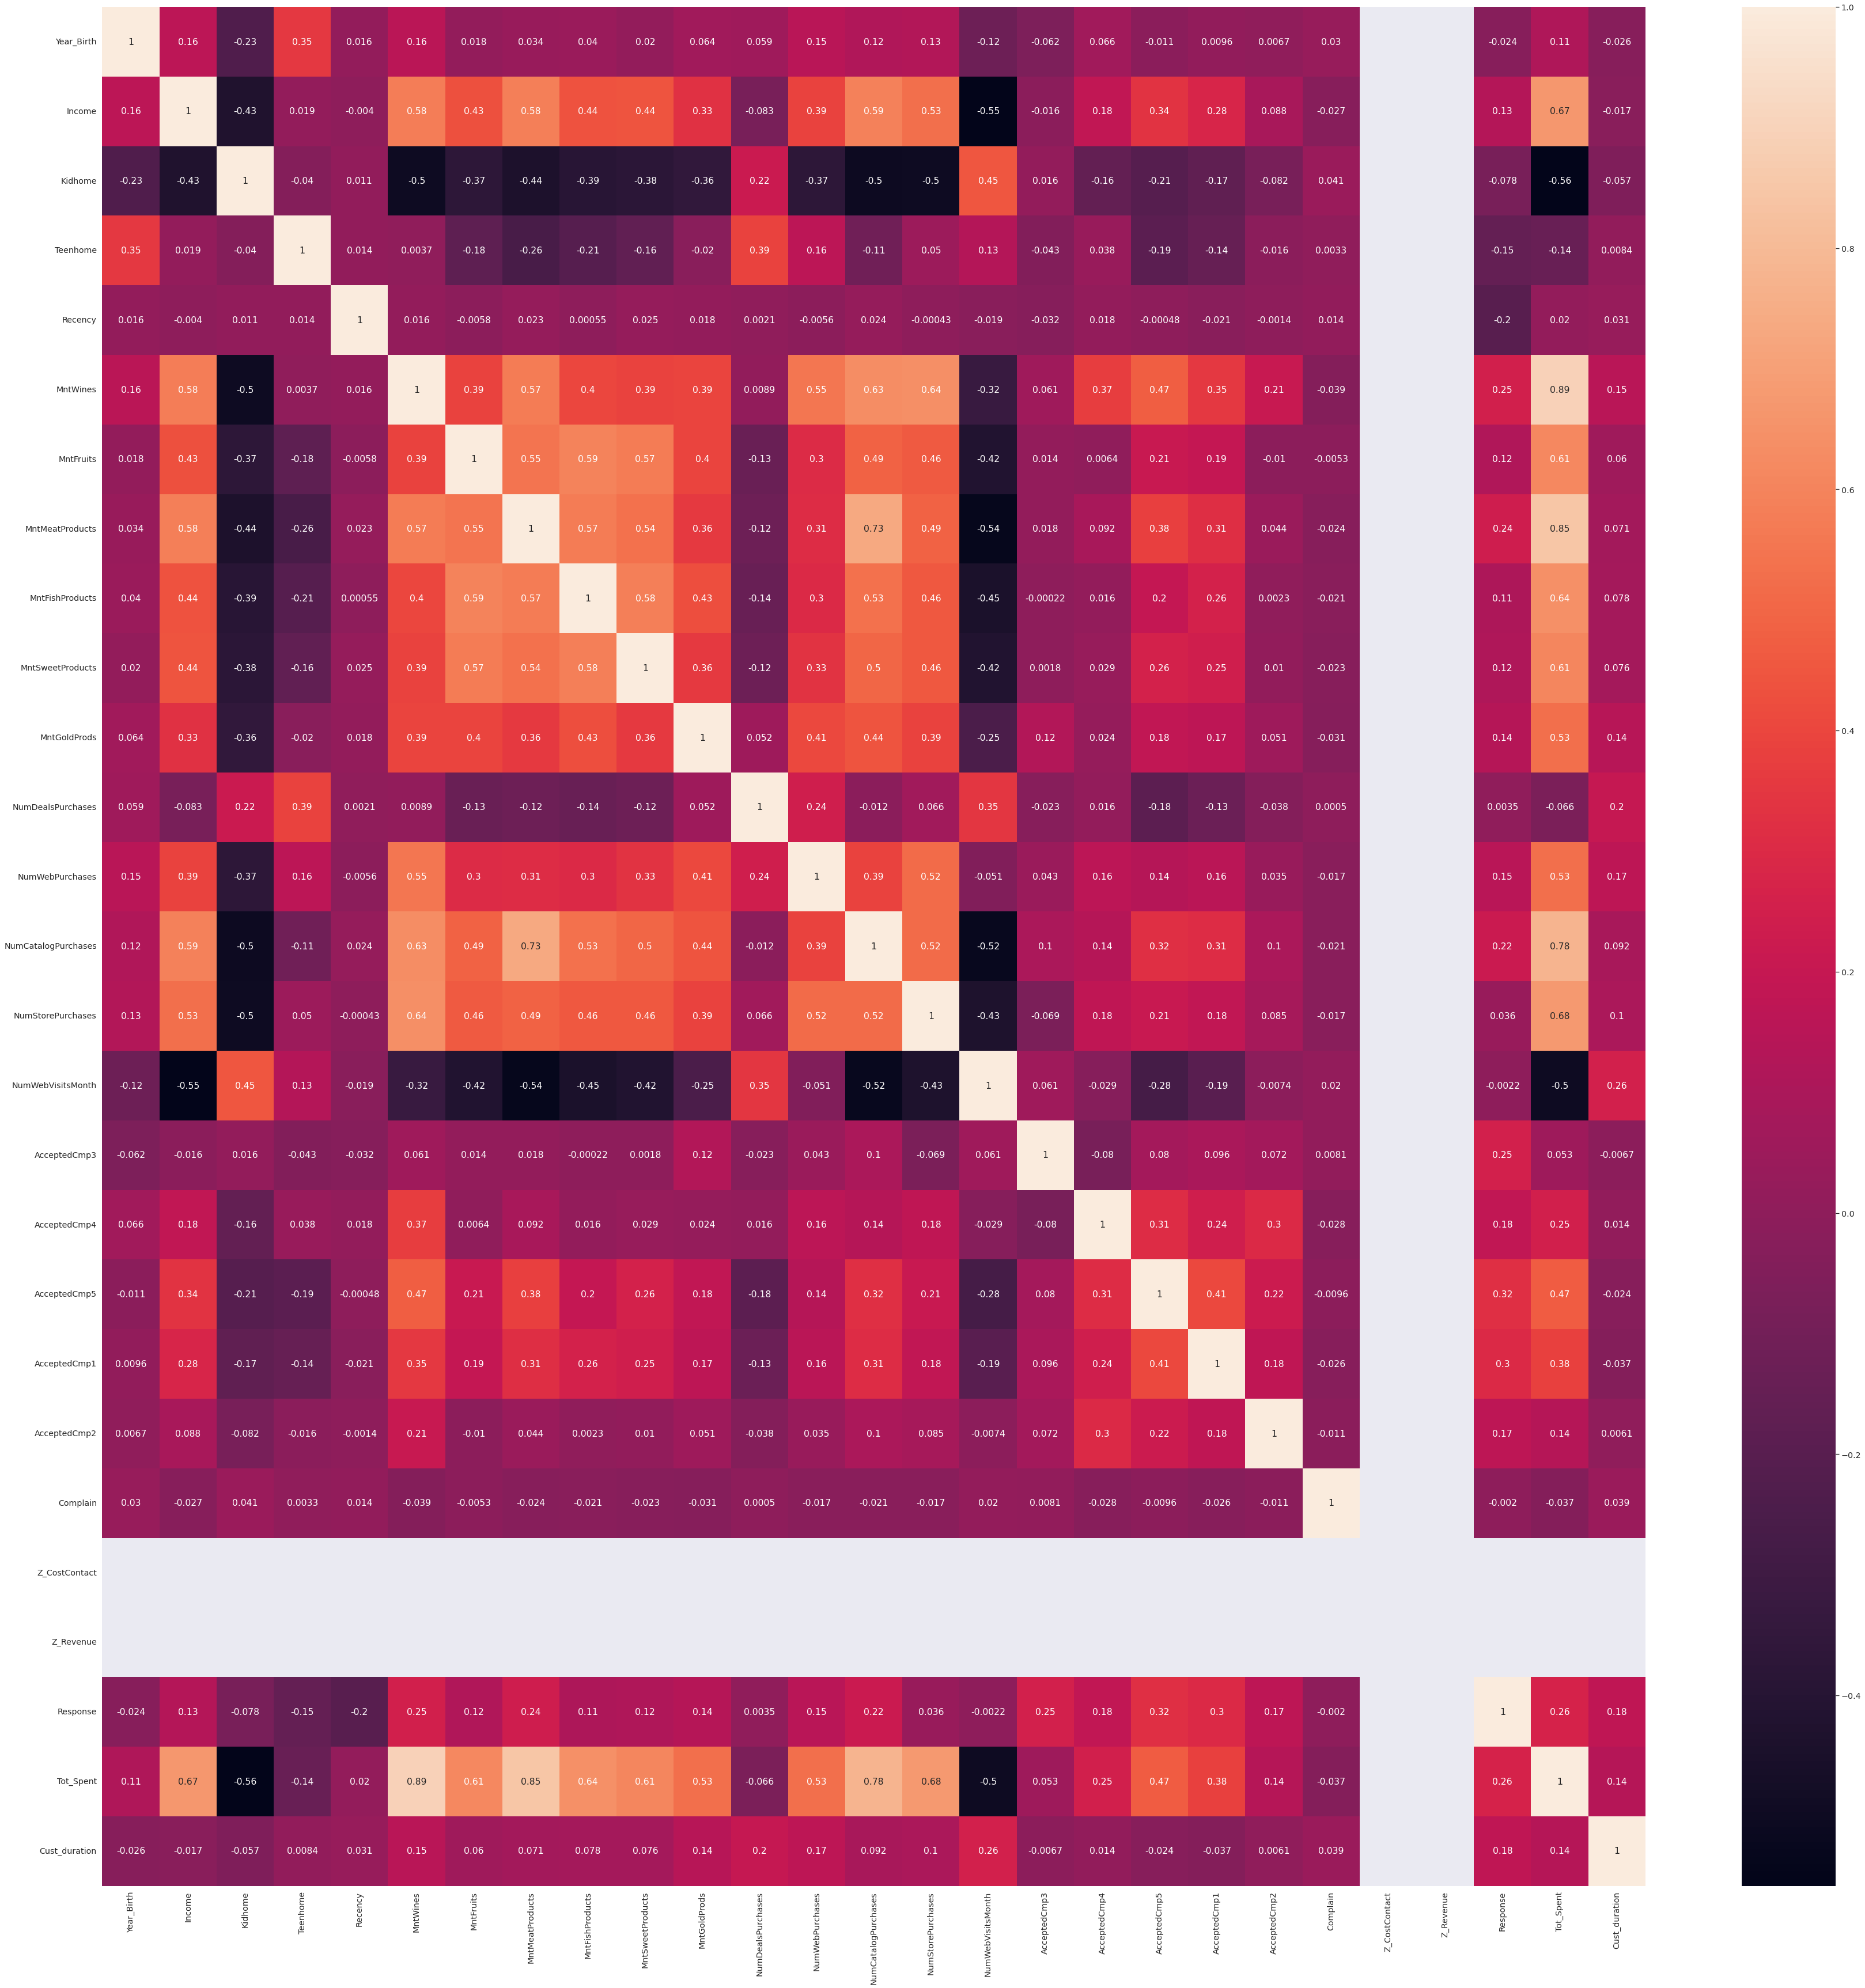

In [15]:
plt.figure(figsize=(60,60))

corr=df.corr()
sns.heatmap(corr,annot=True)

In [16]:
#Recalculating

cat_features = [x for x in df.columns if df[x].dtypes == 'object']
num_features = [x for x in df.columns if df[x].dtypes != 'object']

print(cat_features)
print(num_features)

#separating continous and discrete numeric variables

cont_num_features = [x for x in num_features if len(df[x].unique()) >= 10]

disc_num_features = list(set(num_features)-set(cont_num_features))

print("Cont", cont_num_features)
print(len(cont_num_features))
print("Disc", disc_num_features)
print(len(disc_num_features))



['Education', 'Marital_Status']
['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Tot_Spent', 'Cust_duration']
Cont ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Tot_Spent', 'Cust_duration']
16
Disc ['Teenhome', 'AcceptedCmp3', 'Kidhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp5', 'Response', 'AcceptedCmp4', 'Z_Revenue', 'Complain', 'Z_CostContact']
11


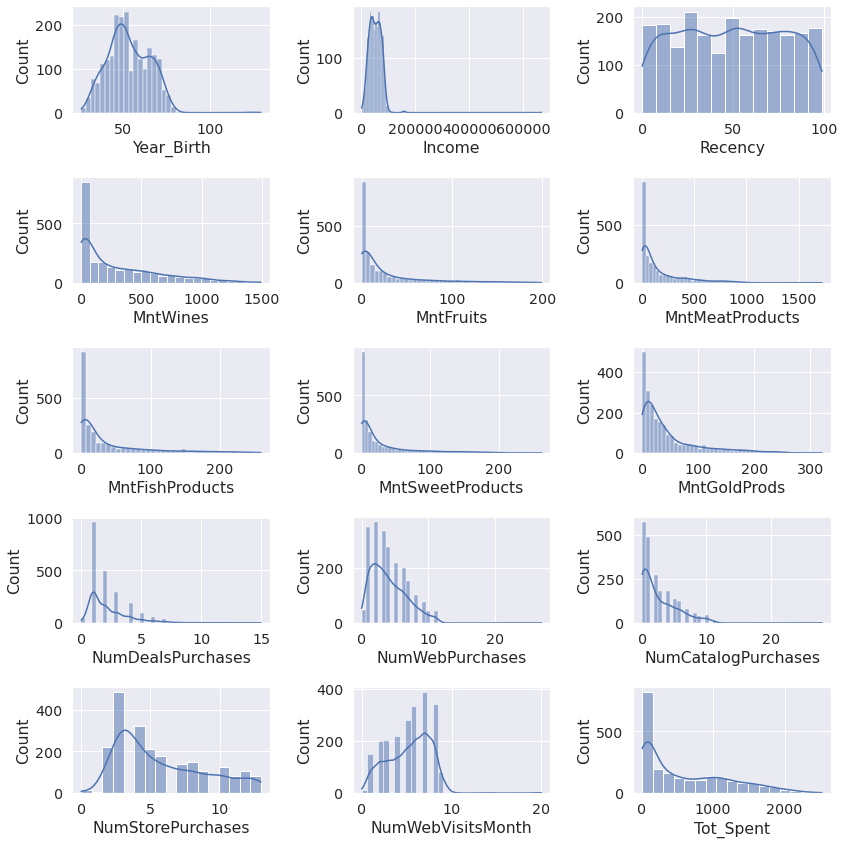

In [17]:
#Draw histogram for the continuous numeric variables

fig,ax1 = plt.subplots(round(len(cont_num_features)/3),3,figsize=(12,12))

for i,ax in enumerate(fig.axes):
    if i < len(cont_num_features):
        sns.histplot(df[cont_num_features[i]],kde=True,ax=ax)

plt.tight_layout()

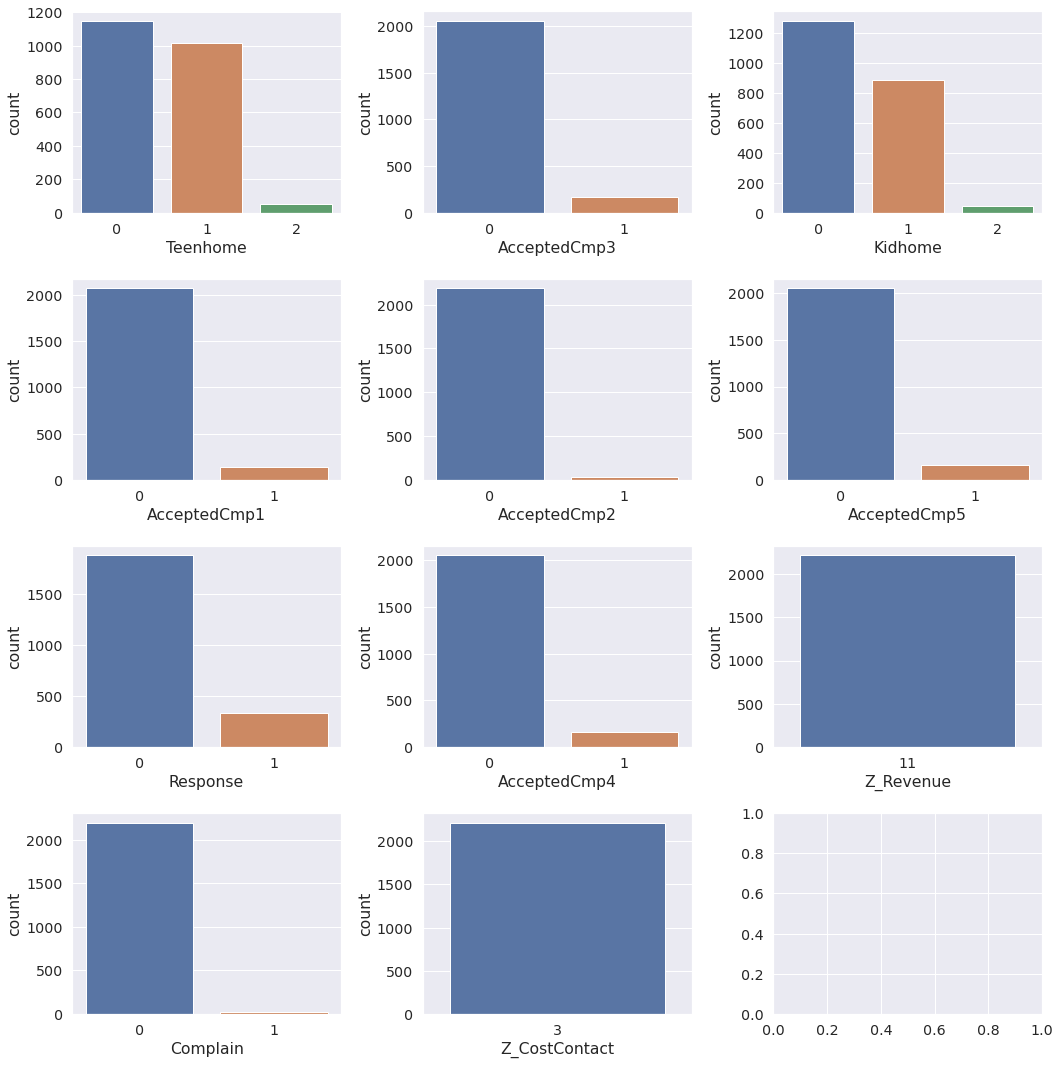

In [18]:
# Draw Countplot for the discrete numeric variables

fig,ax1 = plt.subplots(round(len(disc_num_features)/3),3,figsize=(15,15))

for i,ax in enumerate(fig.axes):
    if i < len(disc_num_features):
        sns.countplot(data=df, x= disc_num_features[i],ax=ax)
        
plt.tight_layout()

In [19]:
# OneHotEncoder to convert categorical columns to numerical

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

encoded = ohe.fit(df[cat_features])

df_oh = pd.DataFrame(encoded.transform(df[cat_features]))
df_oh.index = df.index

df_oh.head()

# print(df.shape)
# print(df_oh.shape)



,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
#drop categorical columns and concat onehot-encoded columns

df.drop(cat_features,axis='columns',inplace=True)
df=pd.concat([df,df_oh],axis='columns')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [22]:
from sklearn.preprocessing import StandardScaler

stdscalar = StandardScaler()

df_scaled = pd.DataFrame(stdscalar.fit_transform(df),columns=df.columns)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [23]:
df_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Tot_Spent,Cust_duration,0,1,2,3,4,5,6,7
0,0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,1.675488,1.974875,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.407065,-1.348829,1.924807
1,1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.962358,-1.665141,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.407065,-1.348829,1.924807
2,0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,0.280250,-0.172132,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.407065,0.741384,-0.519533
3,-1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.919224,-1.923298,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.407065,0.741384,-0.519533
4,-1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-0.307044,-0.821827,-0.31497,-0.158041,-1.007246,-0.444062,1.899228,-0.407065,0.741384,-0.519533


#### Using PCA for dimensionality reduction

In [24]:
from sklearn.decomposition import PCA

# pca = PCA(0.70)
pca = PCA(n_components = 5)

pca.fit(df_scaled)

df_pca = pca.transform(df_scaled)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [25]:
print(pca.explained_variance_ratio_)
print(pca.n_components_)
# print(pca.components_)

[0.22675986 0.06776628 0.06053105 0.05531653 0.05186231]
5


#### Using Elbow method to find the number of clusters required

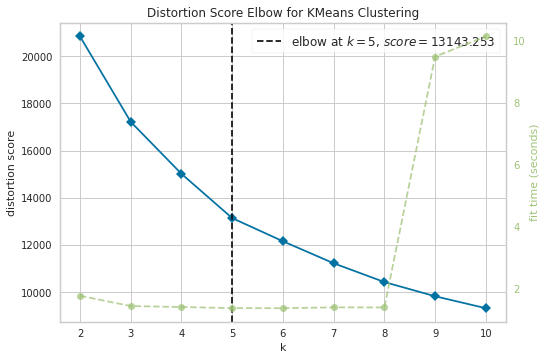

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elb = KElbowVisualizer(KMeans(),k=10)
elb.fit(df_pca)
elb.show()


### Agglomerative Clustering

In [27]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=5)

yhat_ac = ac.fit_predict(df_pca)

df["Cluster_ac"] = yhat_ac

<AxesSubplot:xlabel='Cluster_ac', ylabel='count'>

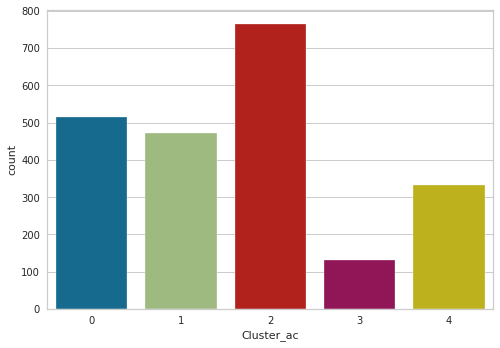

In [28]:
# count plot of the clusters

sns.countplot(data=df,x="Cluster_ac")

<AxesSubplot:xlabel='Tot_Spent', ylabel='Income'>

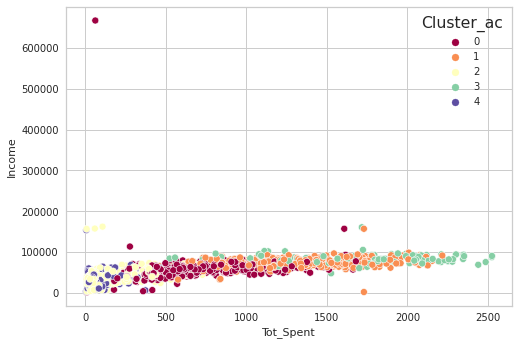

In [29]:
#scatter plot with Income and Spent
#choose colormaps based on this
#https://matplotlib.org/stable/tutorials/colors/colormaps.html?msclkid=58e2e06dce4b11ecaf92fc2ddb0b8b63

sns.scatterplot(data=df,y="Income",x="Tot_Spent",hue=df["Cluster_ac"],palette="Spectral")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


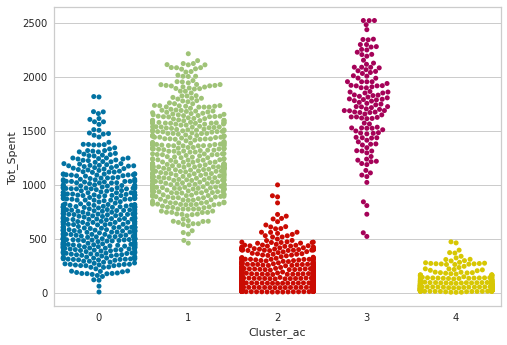

<AxesSubplot:xlabel='Cluster_ac', ylabel='Tot_Spent'>

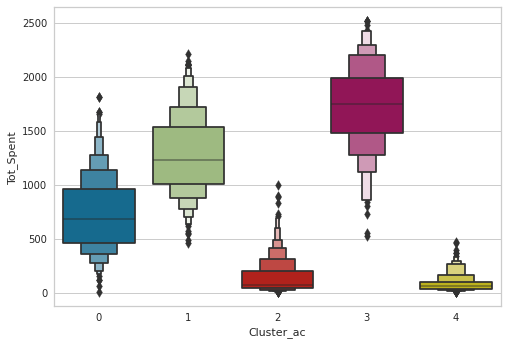

In [30]:
sns.swarmplot(x=df["Cluster_ac"],y=df["Tot_Spent"])
plt.show()
sns.boxenplot(x=df["Cluster_ac"],y=df["Tot_Spent"])

#### Affiity propagation Clustering

In [31]:
from sklearn.cluster import AffinityPropagation

#To tune the model try setting the damping parameter between 0.5 and 1

ap = AffinityPropagation(damping = 0.7)

yhat_ap = ap.fit_predict(df_pca)

df["Cluster_ap"] = yhat_ap




In [32]:
len(df["Cluster_ap"].unique())

78

<AxesSubplot:xlabel='Cluster_ap', ylabel='count'>

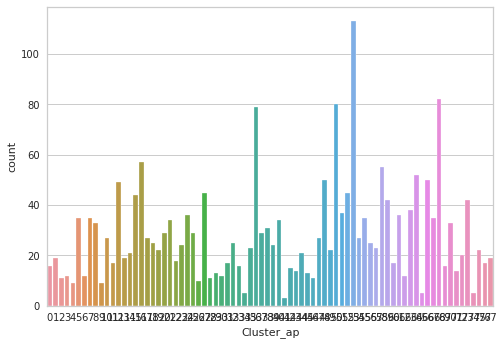

In [33]:
# count plot of the clusters

sns.countplot(data=df,x="Cluster_ap")

<AxesSubplot:xlabel='Tot_Spent', ylabel='Income'>

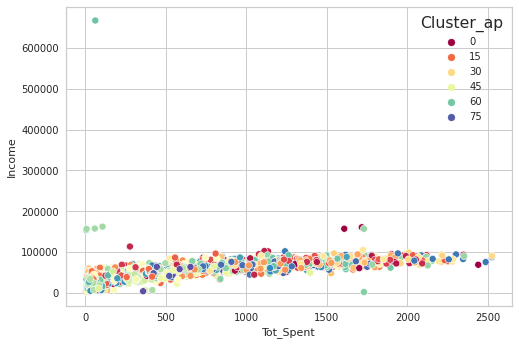

In [34]:
#scatter plot with Income and Spent
#choose colormaps based on this
#https://matplotlib.org/stable/tutorials/colors/colormaps.html?msclkid=58e2e06dce4b11ecaf92fc2ddb0b8b63

sns.scatterplot(data=df,y="Income",x="Tot_Spent",hue=df["Cluster_ap"],palette="Spectral")

AffinityPropagation algorithm does not seem to give good results

#### BIRCH - Balanced Iterative Reducing and Clustering using Hierarchies

In [35]:
#This involves creating a tree structure from which the centroids are derived.
#this need to be tuned for n_clusters and threshold

from sklearn.cluster import Birch

br = Birch(n_clusters= 5, threshold = 0.01)

yhat_br = br.fit_predict(df_pca)

df["Cluster_br"] = yhat_br

len(df["Cluster_br"].unique())

5

<AxesSubplot:xlabel='Cluster_br', ylabel='count'>

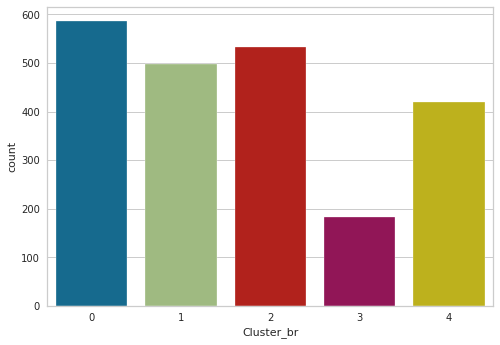

In [36]:
# count plot of the clusters

sns.countplot(data=df,x="Cluster_br")

<AxesSubplot:xlabel='Tot_Spent', ylabel='Income'>

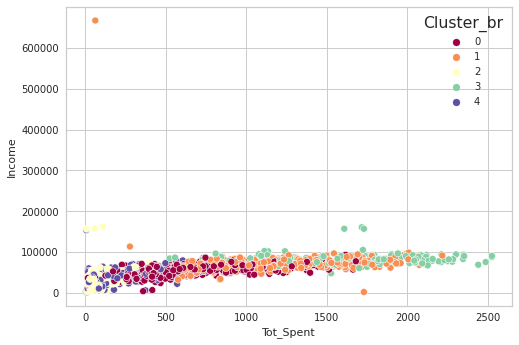

In [37]:
#scatter plot with Income and Spent
#choose colormaps based on this
#https://matplotlib.org/stable/tutorials/colors/colormaps.html?msclkid=58e2e06dce4b11ecaf92fc2ddb0b8b63

sns.scatterplot(data=df,y="Income",x="Tot_Spent",hue=df["Cluster_br"],palette="Spectral")

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [38]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=30,min_samples=9)

yhat_db = db.fit_predict(df_pca)

df["Cluster_db"] = yhat_db

len(df['Cluster_db'].unique())


1

<AxesSubplot:xlabel='Cluster_db', ylabel='count'>

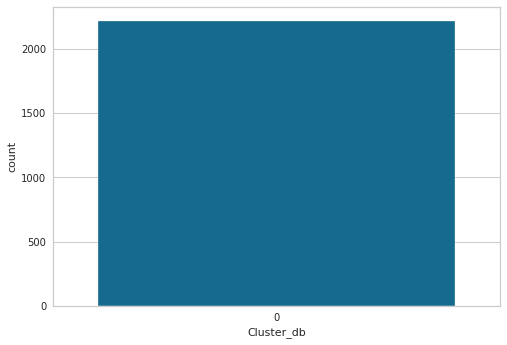

In [39]:
# count plot of the clusters

sns.countplot(data=df,x="Cluster_db")

<AxesSubplot:xlabel='Tot_Spent', ylabel='Income'>

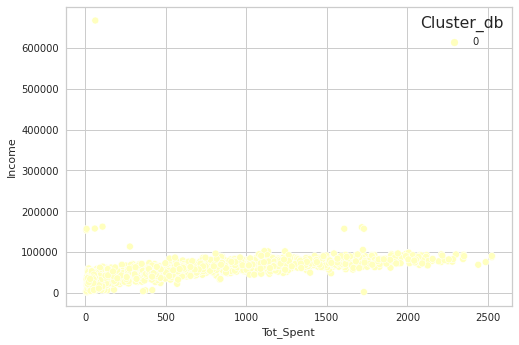

In [40]:
#scatter plot with Income and Spent
#choose colormaps based on this
#https://matplotlib.org/stable/tutorials/colors/colormaps.html?msclkid=58e2e06dce4b11ecaf92fc2ddb0b8b63

sns.scatterplot(data=df,y="Income",x="Tot_Spent",hue=df["Cluster_db"],palette="Spectral")

#### Mini batch KMeans

Mini batch KMeans is a modified version of original Kmeans where it makes updates to the
cluster centroids using mini-batches of samples rather than the full set
faster for large datasets


In [41]:
from sklearn.cluster import MiniBatchKMeans

mb = MiniBatchKMeans(n_clusters=4)

yhat_mb = mb.fit_predict(df_pca)

df["Cluster_mb"] = yhat_mb

len(df['Cluster_mb'].unique())

4

<AxesSubplot:xlabel='Cluster_mb', ylabel='count'>

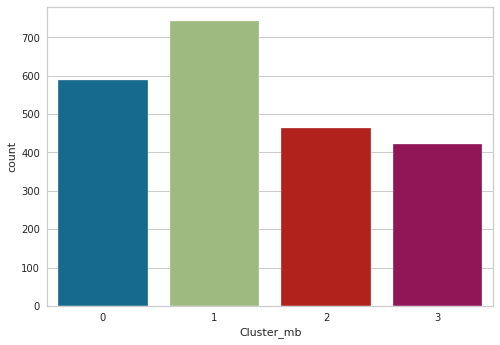

In [42]:
# count plot of the clusters 

sns.countplot(data=df,x="Cluster_mb")

<AxesSubplot:xlabel='Tot_Spent', ylabel='Income'>

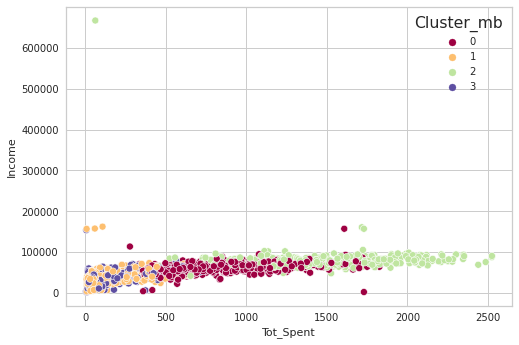

In [43]:
#scatter plot with Income and Spent
#choose colormaps based on this
#https://matplotlib.org/stable/tutorials/colors/colormaps.html?msclkid=58e2e06dce4b11ecaf92fc2ddb0b8b63

sns.scatterplot(data=df,y="Income",x="Tot_Spent",hue=df["Cluster_mb"],palette="Spectral")

### Mean Shift Clustering

Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

In [44]:
from sklearn.cluster import MeanShift


ms = MeanShift()

yhat_ms = ms.fit_predict(df_pca)

df["Cluster_ms"] = yhat_ms

len(df['Cluster_ms'].unique())


1

<AxesSubplot:xlabel='Cluster_ms', ylabel='count'>

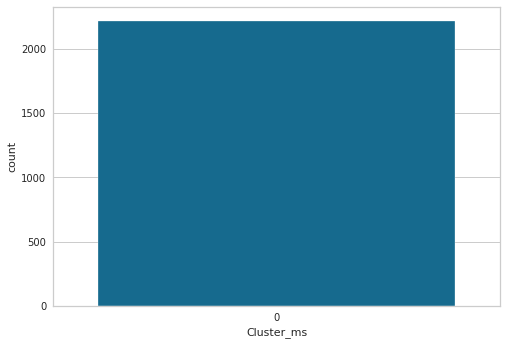

In [45]:
# count plot of the clusters

sns.countplot(data=df,x="Cluster_ms")

<AxesSubplot:xlabel='Tot_Spent', ylabel='Income'>

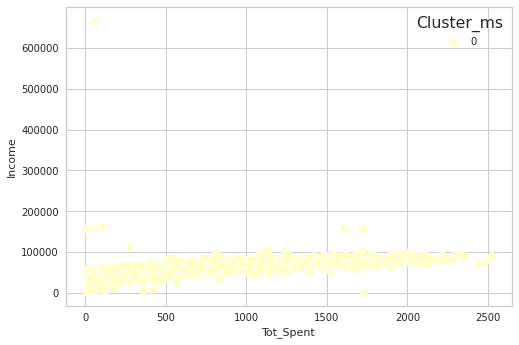

In [46]:
#scatter plot with Income and Spent
#choose colormaps based on this
#https://matplotlib.org/stable/tutorials/colors/colormaps.html?msclkid=58e2e06dce4b11ecaf92fc2ddb0b8b63

sns.scatterplot(data=df,y="Income",x="Tot_Spent",hue=df["Cluster_ms"],palette="Spectral")

#### OPTICS

OPTICS (Ordering Points To Identify Clustering Structure) is a modified version of DBSCAN algorithm

In [47]:
from sklearn.cluster import OPTICS

# The main hyperparameters are eps and min_samples

op = OPTICS(eps=0.8, min_samples=10)

yhat_op = op.fit_predict(df_pca)

df["Cluster_op"] = yhat_op

len(df['Cluster_op'].unique())


17

<AxesSubplot:xlabel='Cluster_op', ylabel='count'>

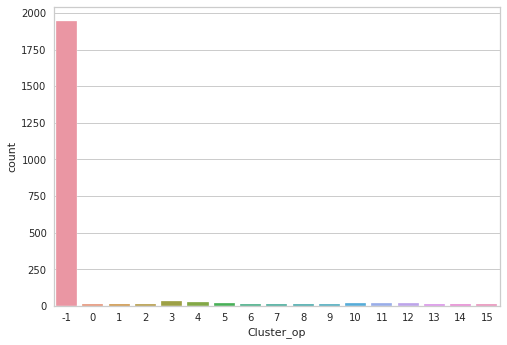

In [48]:
# count plot of the clusters

sns.countplot(data=df,x="Cluster_op")

<AxesSubplot:xlabel='Tot_Spent', ylabel='Income'>

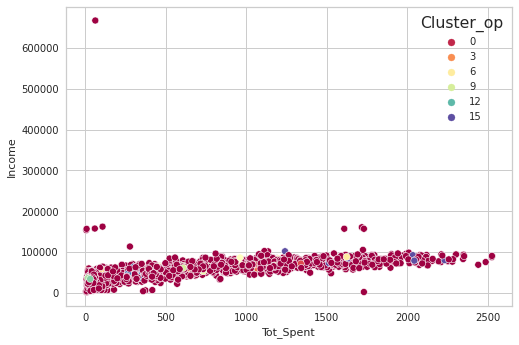

In [49]:
#scatter plot with Income and Spent
#choose colormaps based on this
#https://matplotlib.org/stable/tutorials/colors/colormaps.html?msclkid=58e2e06dce4b11ecaf92fc2ddb0b8b63

sns.scatterplot(data=df,y="Income",x="Tot_Spent",hue=df["Cluster_op"],palette="Spectral")

### Spectral Clustering


This is a generic type of clustering from Linear Algebra




In [50]:
from sklearn.cluster import SpectralClustering

sp = SpectralClustering(n_clusters=4)

yhat_sp = sp.fit_predict(df_pca)

df["Cluster_sp"] = yhat_sp

len(df['Cluster_sp'].unique())


4

<AxesSubplot:xlabel='Cluster_sp', ylabel='count'>

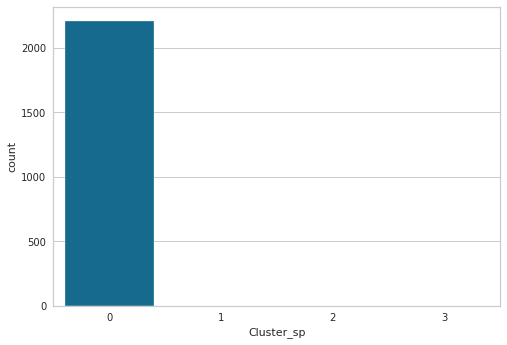

In [51]:
# count plot of the clusters

sns.countplot(data=df,x="Cluster_sp")

<AxesSubplot:xlabel='Tot_Spent', ylabel='Income'>

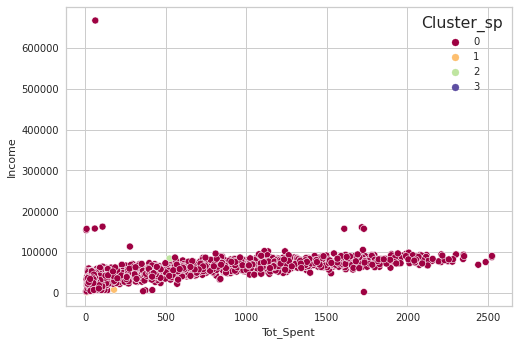

In [52]:

sns.scatterplot(data=df,y="Income",x="Tot_Spent",hue=df["Cluster_sp"],palette="Spectral")

#### Gaussian Mixture model

In [53]:
from sklearn.mixture import GaussianMixture

gm= GaussianMixture(n_components = 4)

yhat_gm = gm.fit_predict(df_pca)

df["Cluster_gm"] = yhat_gm

len(df['Cluster_gm'].unique())

4

<AxesSubplot:xlabel='Cluster_gm', ylabel='count'>

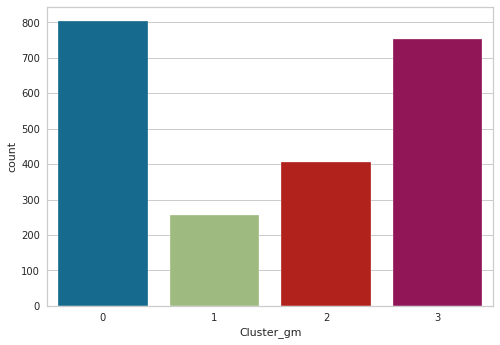

In [54]:
# count plot of the clusters

sns.countplot(data=df,x="Cluster_gm")

<AxesSubplot:xlabel='Tot_Spent', ylabel='Income'>

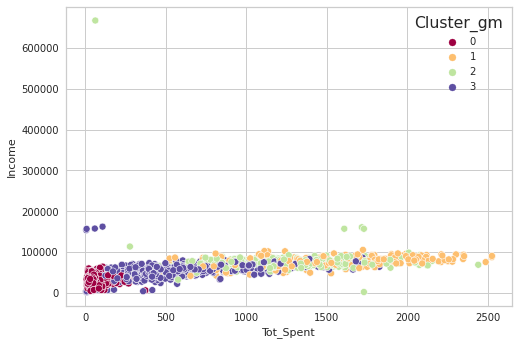

In [55]:

sns.scatterplot(data=df,y="Income",x="Tot_Spent",hue=df["Cluster_gm"],palette="Spectral")